In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display, clear_output
import time

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Generate synthetic data
def generate_data(n_samples=30, noise=10):
    """Generate synthetic data with noise"""
    X = np.linspace(0, 10, n_samples).reshape(-1, 1)
    true_m, true_c = 2.5, 7.0  # True parameters
    Y = true_m * X + true_c + noise * np.random.randn(n_samples, 1)
    return X, Y, true_m, true_c

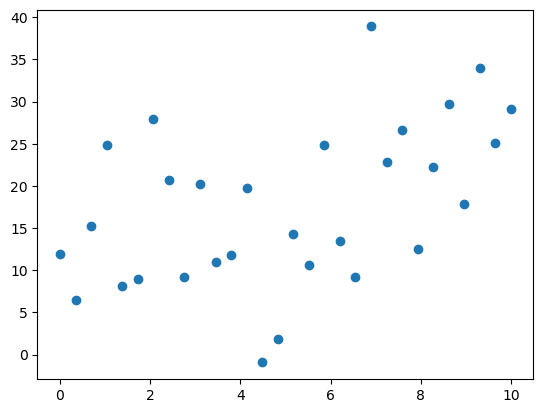

In [3]:
X, Y, m, c = generate_data()
import matplotlib.pyplot as plt
plt.scatter(X, Y)

In [4]:
X.shape

(30, 1)

In [5]:
# Mean Squared Error loss function
def compute_loss(X, Y, m, c):
    """Compute Mean Squared Error loss"""
    n_samples = X.shape[0]
    predictions = m * X + c  # Our linear model: y = mx + c
    loss = np.sum((Y - predictions) ** 2)
    return loss